In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [58]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력 default:20
pd.set_option('display.max_rows', 10) #None으로 설정하면 모든 행 출력 default: 50

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력 default:60

In [4]:
# 정규화
import re

In [5]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-30 09:45:38.119206


'2024-12-30'

In [6]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”",\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에...,2024-12-30 08:29:19


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [9]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,85
top,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”",\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에...,2024.12.29 17:38
freq,50,1,1,9


In [10]:
# 중복된 행이 있는지 확인
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [11]:
df.duplicated().sum()

0

In [13]:
df['작성일시'].value_counts().sort_values(ascending=False).head().index

Index(['2024.12.29 17:38', '2024-12-27 17:58:23', '2024.12.30 07:00',
       '2024.12.29 07:00', '2024.12.27 18:03'],
      dtype='object', name='작성일시')

In [14]:
df[df.duplicated(subset='작성일시')].sort_values(by='작성일시')

,언론사,제목,내용,작성일시
29,매일경제,"""트럼프 규제완화땐 사모시장 투자 더 활발""",\n\n\n제프리 디엘 애덤스 스트리트 파트너스 투자부문 대표관세는 사모시장 협상의 도구글로벌 펀드 ...,2024-12-27 17:58:23
9,매일경제,테슬라 4분기 인도량 '주목',\n 사진 확대 \n지난주 국내 증시는 원화가치 폭락과 배당락이 부담으로 작용하며 고...,2024-12-29 16:43:56
6,매일경제,구글·테슬라·아마존 '로보택시' 쟁탈전,"\n\n\n내년부터 본격 상용화 전망GM 철수로 업계 지각변동구글 선두, 테슬라 맹추격\n\n\n ...",2024-12-29 16:44:11
94,한국경제,전업투자자가 53개 계좌로 주가조작,\n 금융감독당국이 50개가 넘...,2024.12.27 18:03
86,한국경제,"""5000만원으로 시작했는데""…'84억' 주식 부자 된 비결 [윤현주의 主食이 주식]",\n백문불여일견(百聞不如一見). 백 번 듣는 것보다 한 번 보는 게 낫다는 말이다. 가짜뉴스 홍수 속...,2024.12.29 07:00
...,...,...,...,...
76,한국경제,"中 알리와 손잡은 이마트, 주가는 뚝",\n이마트가 중국 알리바바와 손잡고 e커머스 사업 승부수를 띄웠지만 주가는 오히려 급락했다. 이마트의...,2024.12.29 17:38
77,한국경제,"""마이크로스트래티지, 비트코인에만 의존""",\n\n\n\n\n사진=REUTERS\n\n 비트코인을 가장 많이 보유한 ...,2024.12.29 17:38
78,한국경제,"자산가, 조선·금융주 매집…고수는 SK하이닉스 베팅",\n 대형 증권사 고액 자산가들...,2024.12.29 17:38
69,한국경제,"""내년 코스피 최대 20% 오른다…악재 선반영, 밸류에이션 최저""",\n\n\n\n\n\n 국내 주요 증권사들은 내년에 코스피지수가 최대 20...,2024.12.29 17:39


In [15]:
df.duplicated().describe()

count       100
unique        1
top       False
freq        100
dtype: object

In [16]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [17]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [18]:
# 제목,내용 토큰 갯수
# split() : 공백을 구분자로 list로 반환해주기때문에 str 두번써야됨
df['제목_토큰_갯수'] = df['제목'].str.split().str.len()
df['내용_토큰_갯수'] = df['내용'].str.split().str.len()

In [19]:
df[['제목_길이','제목_토큰_갯수','내용_길이','내용_토큰_갯수']].describe()

,제목_길이,제목_토큰_갯수,내용_길이,내용_토큰_갯수
count,100.000000,100.00000,100.000000,100.000000
mean,34.060000,7.36000,1477.070000,303.210000
std,8.768424,2.08661,1090.194768,228.126551
min,10.000000,1.00000,110.000000,16.000000
25%,28.000000,6.00000,849.250000,174.000000
50%,33.500000,7.00000,1060.500000,224.000000
75%,40.000000,9.00000,1723.500000,365.000000
max,53.000000,13.00000,8033.000000,1604.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_갯수  100 non-null    int64 
 7   내용_토큰_갯수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_갯수'}>,
        <Axes: title={'center': '내용_토큰_갯수'}>]], dtype=object)

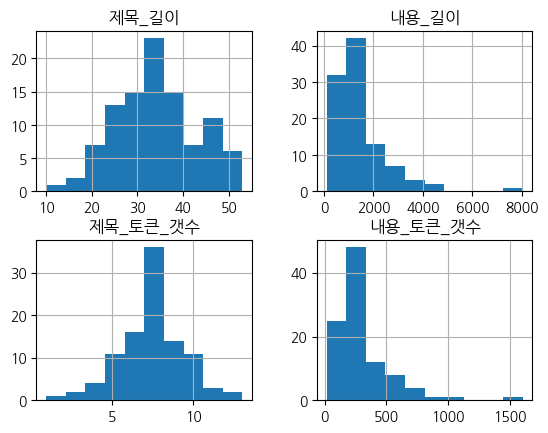

In [21]:
df.hist(bins=10)

In [22]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수
38,매일경제,"“트럼프 집권 후 관세 어찌하나요?” 삼일PwC, ‘트럼프 2기’ 대비 글로벌 통상 전문팀 출범",\n 통상·국제조세·공급망 전문가 구성해외 네트워크 협력도 강점 꼽혀관세 전략부터 공급망 재편까지 ‘...,2024-12-27 14:14:35,53,1052,13,225


In [23]:
df[df['제목_길이'] == df['제목_길이'].max()]['제목'].values

array(['“트럼프 집권 후 관세 어찌하나요?” 삼일PwC, ‘트럼프 2기’ 대비 글로벌 통상 전문팀 출범'],
      dtype=object)

#### 워드클라우드 시각화

- https://github.com/amueller/word_cloud

In [24]:
# 제목을 하나의 문자열로 만들기 (제목과 제목사이에 공백을 하나 줌)
news_title = ' '.join(df['제목'])

# 문자열도 인덱싱/슬라이싱이 가능
news_title[:100]

'“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것” 이지영 서울의대 신경과 교수 “GV1001 PSP 2a 임상 데이터 상당히 고무적” “이마트, G'

In [25]:
WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [33]:
def display_word_cloud(str, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','증시','한국']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

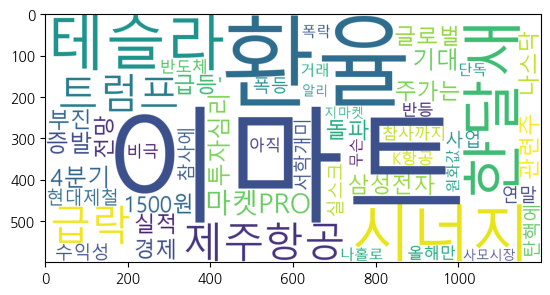

In [34]:
display_word_cloud(news_title,50)

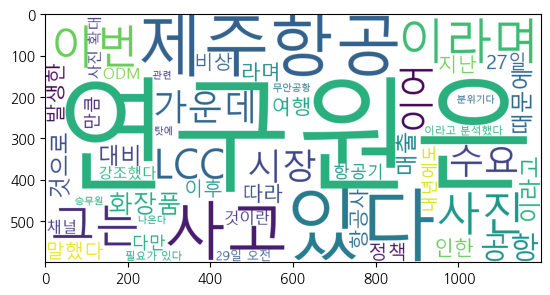

In [35]:
tmp_str = ''.join(df[df['제목'].str.contains('제주항공')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

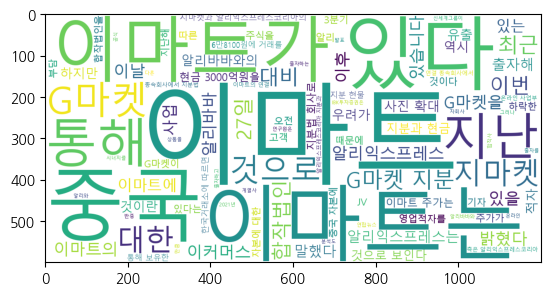

In [37]:
tmp_str = ''.join(df[df['제목'].str.contains('이마트')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,100)

In [ ]:
tmp_word_cloud.words_

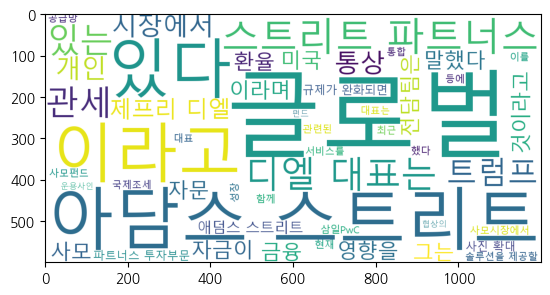

In [38]:
tmp_str = ''.join(df[df['제목'].str.contains('트럼프')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

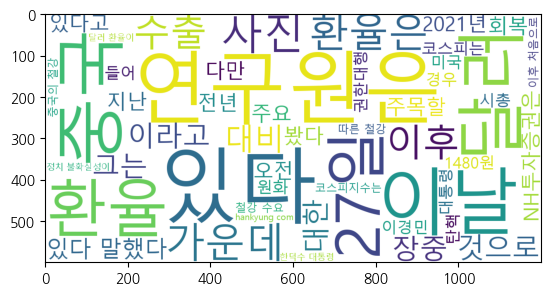

In [40]:
tmp_str = ''.join(df[df['제목'].str.contains('환율')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [34]:
tmp_word_cloud.words_

{'실적': 1.0,
 '삼성전자': 0.8181818181818182,
 '것으로': 0.8181818181818182,
 '하향': 0.8181818181818182,
 'KB증권은': 0.7272727272727273,
 '2025년': 0.6363636363636364,
 '영업이익은': 0.6363636363636364,
 '확대': 0.5454545454545454,
 'HBM': 0.45454545454545453,
 '현재': 0.45454545454545453,
 '예상': 0.45454545454545453,
 '수요': 0.45454545454545453,
 '따른': 0.45454545454545453,
 '목표주가': 0.45454545454545453,
 '사진': 0.36363636363636365,
 '4분기': 0.36363636363636365,
 '영업이익': 0.36363636363636365,
 '향후': 0.36363636363636365,
 '메모리': 0.36363636363636365,
 '가격': 0.36363636363636365,
 '가운데': 0.36363636363636365,
 '반도체': 0.36363636363636365,
 'HBM3E': 0.36363636363636365,
 '둔화될': 0.36363636363636365,
 '파운드리': 0.36363636363636365,
 '지속되고': 0.36363636363636365,
 '증권사': 0.36363636363636365,
 '지난': 0.36363636363636365,
 '이달': 0.36363636363636365,
 '매출': 0.36363636363636365,
 '밸류에이션': 0.36363636363636365,
 '출시': 0.36363636363636365,
 '삼성전자의 4분기': 0.36363636363636365,
 '매수 유지': 0.36363636363636365,
 '체크 포인트': 0.363636363636363

#### 형태소 분석기로 특정품사만 추출하기

In [ ]:
# !pip install pecab

In [41]:
from pecab import PeCab
pecab = PeCab()

In [42]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [43]:
text = '아버지가 방에 들어가신다 주말 여행 영남권'

In [44]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor(text))

['아버지', '가', '방', '에', '들어가', '신다', '주말', '여행', '영남', '권']
['아버지', '방', '주말', '여행', '영남']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC'), ('주말', 'NNG'), ('여행', 'NNG'), ('영남', 'NNP'), ('권', 'XSN')]


In [45]:
# 처리시간이 걸리는 작업의 프로세스 진행률을 보여줌

from tqdm import tqdm
tqdm.pandas()

In [46]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:01<00:00, 92.22it/s]


In [ ]:
# pecab은 데이터가 많을경우는 속도가 너무 느림
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치

1) 최신버전의 JAVA(JDK)를 설치
2) JAVA_HOME 환경변수를 추가
3) path 환경변수에 %JAVA_HOME%\bin; 추가

#### konlpy 설치
- pip install --upgrade pip
- pip install JPype1    (Java와 Python을 연결해주는 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install


In [47]:
from konlpy.tag import Okt

In [48]:
okt = Okt()

In [49]:
dir(okt)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'jki',
 'morphs',
 'normalize',
 'nouns',
 'phrases',
 'pos',
 'tagset']

In [50]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [51]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [52]:
okt.nouns(txt)

['아버지', '방']

In [53]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:03<00:00, 29.20it/s]


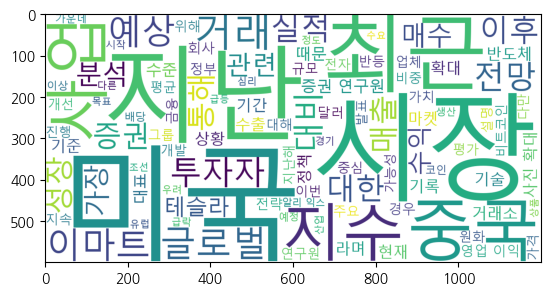

In [54]:
str = ''.join(df['내용_명사'])

dwc = display_word_cloud(str,100)

In [66]:
tmp = df.loc[df[df['내용_명사'].str.contains('테슬라')].index].head(1)['내용'].values[0]
type(tmp)

str

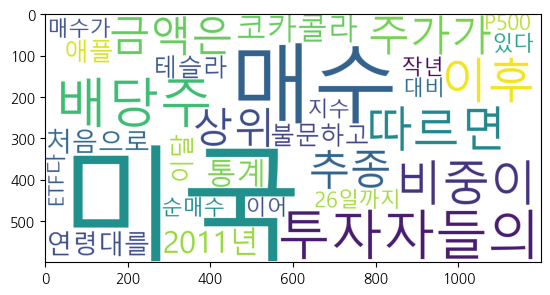

In [67]:
display_word_cloud(tmp,30)

In [70]:
len(okt.pos(tmp))

850

In [80]:
unique_words_dict = {}
for word, tag in okt.pos(tmp):
    if word not in unique_words_dict:
        unique_words_dict[word] = tag

# 딕셔너리의 길이 (고유한 단어 수)
len(unique_words_dict)

370

In [76]:
# 중복된 어휘 제거
unique_words = []
pos_list = []
for word, tag in okt.pos(tmp) :
    if word not in unique_words : 
        unique_words.append(word)
        pos_list.append(tag)

len(unique_words)
for item in zip(unique_words,pos_list) :
    print(item[0], item[1])


# for word, tag in pecab.pos(tmp) :
    # if word == '통해' :
    #     print(word, tag)
    




 Foreign
미국 Noun
주식 Noun
매수 Noun
89% Number
급증 Noun
… Punctuation
해외 Noun
투자 Noun
美 Foreign
비중 Noun
역대 Noun
최고 Noun
지수 Noun
추종 Noun
· Punctuation
고 Modifier
배당 Noun
ETF Alpha
인기 Noun
순 Modifier
톱 Noun
10 Number
종목 Noun
중 Noun
4 Number
개 Noun
차지 Noun
3040 Number
대 Verb
스벅 Noun
코카콜라 Noun
선호 Noun
상속 Noun
증여 Noun
목적 Noun
도 Josa
눈길 Noun
전문가 Noun
" Punctuation
내년 Noun
쏠림 Verb
심화 Noun



       Foreign
사진 Noun
확대 Noun
열풍 Noun
이 Josa
거세지면서 Adjective
국내 Noun
투자자 Noun
들 Suffix
의 Josa
금액 Noun
2011년 Number
통계 Noun
작성 Noun
이후 Noun
올해 Noun
처음 Noun
으로 Josa
95% Number
를 Noun
돌파 Noun
했다 Verb
. Punctuation

 Foreign
' Punctuation
서학 Noun
개미 Noun
들은 Verb
연령 Noun
불문 Noun
하고 Josa
테슬라 Noun
, Punctuation
애플 Noun
엔비디아 Noun
앞 Noun
다퉈 Verb
했지만 Verb
대가 Noun
높아질수록 Verb
주 Noun
하는 Verb
경향 Noun
을 Josa
보였다 Verb
29일 Number
한국 Noun
예 Modifier
탁 Noun
결제 Noun
원 Suffix
에 Josa
따르면 Verb
은 Josa
달 Noun
26일 Number
까지 Foreign
총 Noun
2553억 Number
8000만달러 Number
( Punctuation
약 Noun
375조 Number
3575억원 Number
) Punctuation
로 No

In [82]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_갯수', '내용_토큰_갯수',
       '제목_명사', '내용_명사'],
      dtype='object')

In [83]:
df.to_csv(f'news_preprocessed_{today}.csv',index=False, encoding='utf-8-sig')

In [ ]:
dwc.words_

In [ ]:
okt.tagset?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect = CountVectorizer()

In [ ]:
X = cvect.fit_transform(df['제목_명사'])

In [ ]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

In [ ]:
tmp.sum().sort_values(ascending=False)